<!-- # <span style="color:#FFFFFF; font-size: 0%;">1 | Introduction</span>
<div style="border-radius: 0px; background-color: #112241; text-align:center;">
    <h4 style="color: white; padding: 1.5rem; font-size: 19px"><b>1 | INTRODUCTION</b></h4>
</div>
<!-- <br> -->

<div style="display: flex; flex-direction: row; align-items: center;">
    <div style="flex: 1; margin-right: 12px;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg" alt="Image" style="max-width: 350px; max-height: 400px; border-radius: 0px" />
    </div>
    <div style="flex: 2; margin-top: 0px">
        <p style="font-weight: bold; color: #dc2f02; font-size: 30px; font-weight: bold">INTRODUCTION</p>
        <p>Hi Everyone! Welcome to my notebook.</p>
        <p>My name is <b>MIQ</b>, and I am a Data Scientist. I am passionate about data science, and I am excited to share my findings with you.</p>
        <p>This is a beginner-friendly notebook that attempts to perform Exploratory Data Analysis(EDA) on the <b>Titanic Dataset</b> and eventually train a Ml Models(Random Forest, XGBoost, Logistic Regression,Nbayes, KNN, SVM..) on it and enhance the predictions.</p>
        <p>Let's explore and then make results and discussion to gain deeper insights from our analysis.</p>
        <blockquote>If you find this notebook helpful, please consider upvoting and Follow ❤️</blockquote>
    </div>
</div>


# Table of Contents:

**1. [MetaData](#MetaData)** <br>
**2. [Libraries](#Libraries)** <br>
**3. [LoadDataset](#LoadDatasetn)** <br>
**4. [Visualization](#Visualization)** <br>
**5. [Preprocessing](#Prepocessing)** <br>
**6. [Modelling](#Modelling)** <br>
**7. [Submission](#Submission)** <br>


<a id="MetaData"></a> <br> 
# **1. MetaData:** 
<h3> The data have 891 entries on train dataset and 418 on test dataset</h3>
- 10 columns in train_csv and 9 columns in test_csv

<h2>Competition Description: </h2>
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

<h3>Data Dictionary</h3><br>
Variable	Definition	Key<br>
<b>survived</b>	Survival	0 = No, 1 = Yes<br>
<b>pclass</b>	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd<br>
<b>sex</b>	Sex	<br>
<b>Age</b>	Age in years	<br>
<b>sibsp</b>	# of siblings / spouses aboard the Titanic	<br>
<b>parch</b>	# of parents / children aboard the Titanic	<br>
<b>ticket</b>	Ticket number	<br>
<b>fare</b>	Passenger fare	<br>
<b>cabin</b>	Cabin number	<br>
<b>embarked	</b>Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton<br>
<h3>Variable Notes</h3><br>
<b>pclass: </b>A proxy for socio-economic status (SES)<br>
1st = Upper<br>
2nd = Middle<br>
3rd = Lower<br>
<b>age: </b>Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br>
<b>sibsp:</b> The dataset defines family relations in this way...<br>
- <b>Sibling </b>= brother, sister, stepbrother, stepsister<br>
- <b>Spouse </b>= husband, wife (mistresses and fiancés were ignored)<br>

<b>parch: </b>The dataset defines family relations in this way...<br>
- <b>Parent</b> = mother, father<br>
- <b>Child </b>= daughter, son, stepdaughter, stepson<br>

Some children travelled only with a nanny, therefore parch=0 for them.<br>

<a id="Libraries"></a> <br> 
# **2. Libraries:** 

In [1]:
#import  neccary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Note: These are just neccessary libraries.ML libraries will be added later.

<a id="LoadDataset"></a> <br> 
# **3. LoadDataset:** 

In [2]:
#load the data
train= pd.read_csv("/kaggle/input/titanic/train.csv")
test= pd.read_csv("/kaggle/input/titanic/test.csv")

# submission=pd.read_csv('submission.csv')

# Prepare dataset

We will apply the following transformations on the dataset.\

`I am initiating this process with the intention of enhancing clarity in our exploration of data and visualizations.`

1. Tokenize the names. For example, "Braund, Mr. Owen Harris" will become ["Braund", "Mr.", "Owen", "Harris"].
2. Extract any prefix in the ticket. For example ticket "STON/O2. 3101282" will become "STON/O2." and 3101282.

In [3]:
def preprocess(df):
    df = df.copy()
    
    def normalize_name(x):
        return " ".join([v.strip(",()[].\"'") for v in x.split(" ")])
    
    def ticket_number(x):
        return x.split(" ")[-1]
        
    def ticket_item(x):
        items = x.split(" ")
        if len(items) == 1:
            return "NONE"
        return "_".join(items[0:-1])
    
    df["Name"] = df["Name"].apply(normalize_name)
    df["Ticket_number"] = df["Ticket"].apply(ticket_number)
    df["Ticket_item"] = df["Ticket"].apply(ticket_item)                     
    return df
    
preprocessed_train_df = preprocess(train)
preprocessed_serving_df = preprocess(test)

preprocessed_train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_item
0,1,0,3,Braund Mr Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,21171,A/5
1,2,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,female,38.0,1,0,PC 17599,71.2833,C85,C,17599,PC
2,3,1,3,Heikkinen Miss Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282,STON/O2.
3,4,1,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.0,1,0,113803,53.1000,C123,S,113803,NONE
4,5,0,3,Allen Mr William Henry,male,35.0,0,0,373450,8.0500,NaN,S,373450,NONE
5,6,0,3,Moran Mr James,male,NaN,0,0,330877,8.4583,NaN,Q,330877,NONE
6,7,0,1,McCarthy Mr Timothy J,male,54.0,0,0,17463,51.8625,E46,S,17463,NONE
7,8,0,3,Palsson Master Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S,349909,NONE
8,9,1,3,Johnson Mrs Oscar W Elisabeth Vilhelmina Berg,female,27.0,0,2,347742,11.1333,NaN,S,347742,NONE
9,10,1,2,Nasser Mrs Nicholas Adele Achem,female,14.0,1,0,237736,30.0708,NaN,C,237736,NONE


In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##  Shape of dataset

In [6]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


## Looking data format and types

In [7]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


## Some Statistics


In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


## List of the features within the dataset


In [11]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
print(test.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


* **Numerical Features:** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
* **Categorical Features:** Survived, Sex, Embarked, Pclass
* **Alphanumeric Features:** Ticket, Cabin

#### What are the data types for each feature?
* Survived: int
* Pclass: int
* Name: string
* Sex: string
* Age: float
* SibSp: int
* Parch: int
* Ticket: string
* Fare: float
* Cabin: string
* Embarked: string

Now that we have an idea of what kinds of features we're working with, we can see how much information we have about each of them.


## Missing Values

In [13]:
train.isnull().sum().sort_values(ascending=False).to_frame().rename(columns={0:'missing values'})

,missing values
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


In [14]:
test.isnull().sum().sort_values(ascending=False).to_frame().rename(columns={0:'missing values'})

,missing values
Cabin,327
Age,86
Fare,1
PassengerId,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Ticket,0


<Axes: >

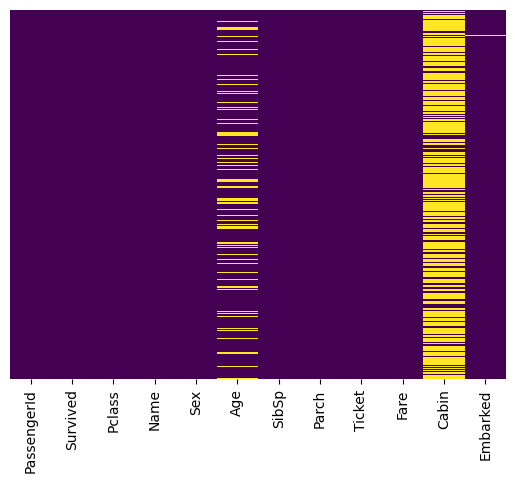

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

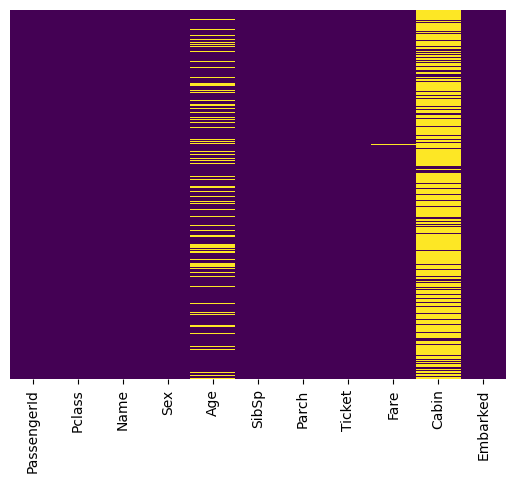

In [16]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Some Observations:
* There are a total of 891 passengers in our training set.
* The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps. 
* The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.
* The Embarked feature is missing 0.22% of its values, which should be relatively harmless.

### Some Predictions:
* Sex: Females are more likely to survive.
* SibSp/Parch: People traveling alone are more likely to survive.
* Age: Young children are more likely to survive.
* Pclass: People of higher socioeconomic class are more likely to survive.

<a id="Visualization"></a> <br> 
# **4.Visualization:** 

It's time to visualize our data through graphs of different features based on Survived Column so we can see whether our predictions were accurate! 

## Sex Feature

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


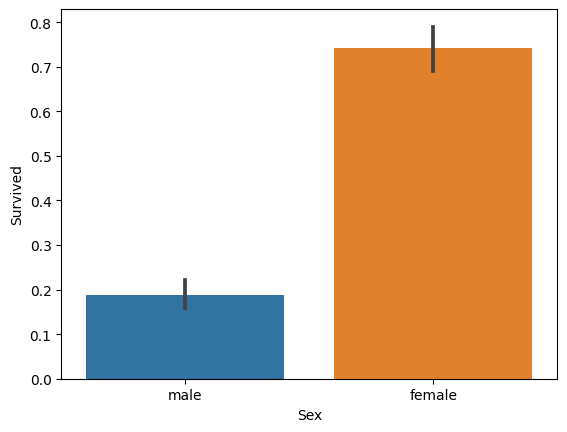

In [17]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

`As We can see , females have a much higher chance of survival than males. The Sex feature is essential in our predictions.`

## Pclass Feature

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


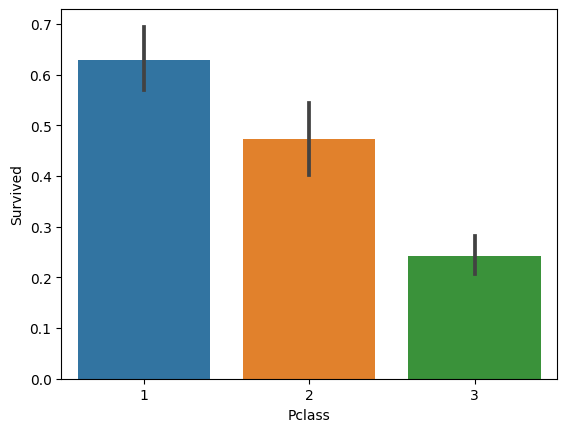

In [18]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

`People with higher socioeconomic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)`

## SibSp Feature

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143
Percentage of SibSp = 3 who survived: 25.0
Percentage of SibSp = 4 who survived: 16.666666666666664


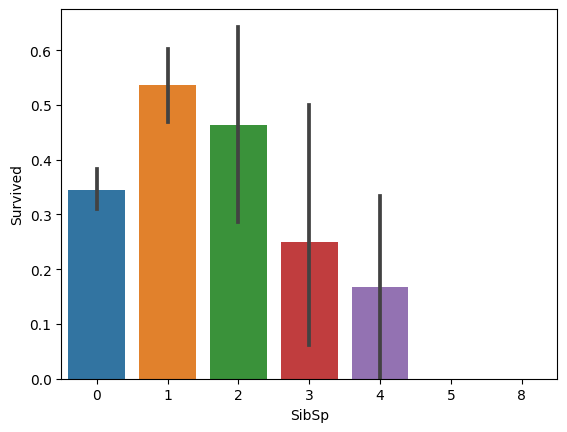

In [19]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 3 who survived:", train["Survived"][train["SibSp"] == 3].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 4 who survived:", train["Survived"][train["SibSp"] == 4].value_counts(normalize = True)[1]*100)


`Generally, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)`

## Age Feature

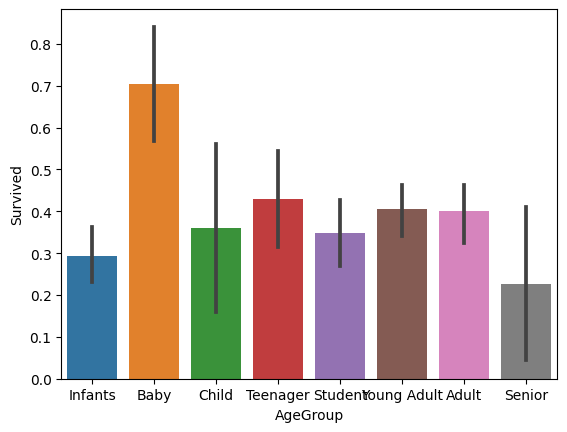

In [20]:
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Infants', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

`Babies are more likely to survive than any other age group. `

## Parch Feature

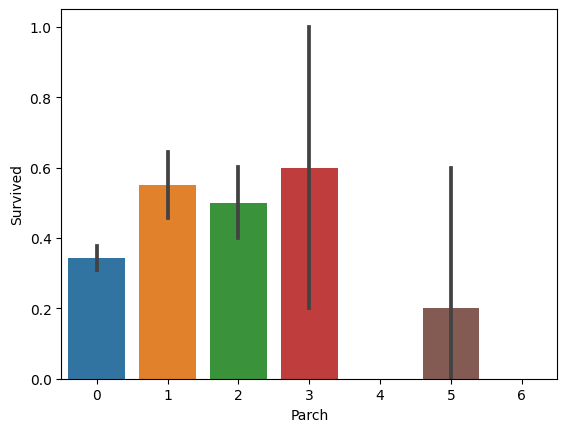

In [21]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

`People with less than four parents or children aboard are more likely to survive than those with four or more. And, people traveling alone are less likely to survive than those with 1-3 parents or children.`

## Cabin Feature

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


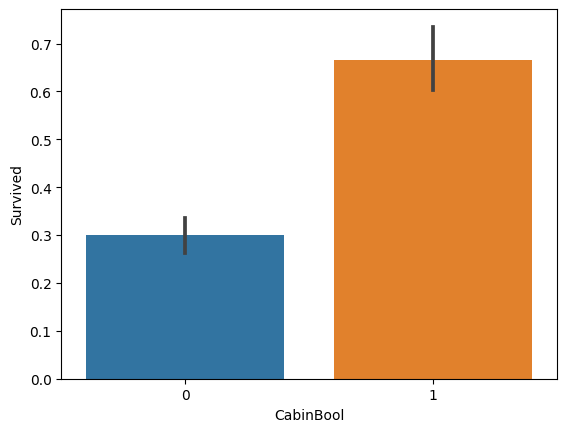

In [22]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

`People with recorded cabin numbers are of higher socioeconomic class, and thus more likely to survive.
People with a recorded Cabin number are, in fact, more likely to survive. (66.6% vs 29.9%)`

<a id="Preprocessing"></a> <br> 
# **5.Preprocessing:** 

### Lets clean our data.

## Test Data

In [23]:
# First we will see our test data
test.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,418.0,NaN,NaN,NaN,1100.5,120.810458,892.0,996.25,1100.5,1204.75,1309.0
Pclass,418.0,NaN,NaN,NaN,2.26555,0.841838,1.0,1.0,3.0,3.0,3.0
Name,418,418,"Kelly, Mr. James",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,418,2,male,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,418.0,NaN,NaN,NaN,23.941388,17.74108,-0.5,9.0,24.0,35.75,76.0
SibSp,418.0,NaN,NaN,NaN,0.447368,0.89676,0.0,0.0,0.0,1.0,8.0
Parch,418.0,NaN,NaN,NaN,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0
Ticket,418,363,PC 17608,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292
Cabin,91,76,B57 B59 B63 B66,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
test.isnull().sum().sort_values(ascending=False).to_frame().rename(columns={0:'missing values'})

,missing values
Cabin,327
Fare,1
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0


* We have a total of 418 passengers.
* 1 value from the Fare feature is missing.
* Around 20.5% of the Age feature is missing, we will need to fill that in.

## Train Data

In [25]:
# First we will see our test data
test.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,418.0,NaN,NaN,NaN,1100.5,120.810458,892.0,996.25,1100.5,1204.75,1309.0
Pclass,418.0,NaN,NaN,NaN,2.26555,0.841838,1.0,1.0,3.0,3.0,3.0
Name,418,418,"Kelly, Mr. James",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,418,2,male,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,418.0,NaN,NaN,NaN,23.941388,17.74108,-0.5,9.0,24.0,35.75,76.0
SibSp,418.0,NaN,NaN,NaN,0.447368,0.89676,0.0,0.0,0.0,1.0,8.0
Parch,418.0,NaN,NaN,NaN,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0
Ticket,418,363,PC 17608,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292
Cabin,91,76,B57 B59 B63 B66,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
test.isnull().sum().sort_values(ascending=False).to_frame().rename(columns={0:'missing values'})

,missing values
Cabin,327
Fare,1
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0


Cleaning..

### Cabin Feature

In [27]:
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

### Ticket Feature

In [28]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

### Name Feature

In [29]:
#We can drop the name feature now that we've extracted the titles.
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

### Embarked Feature

In [30]:
#replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})

#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)


### Fare Feature

In [31]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

### Sex Feature

In [32]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

### Age Feature

In [33]:
# map each Age group
age_mapping = {'Infants': 0, 'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

In [34]:
#check train data
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,CabinBool,FareBand
0,1,0,3,0,22.0,1,0,1,4,0,1
1,2,1,1,1,38.0,1,0,2,6,1,4
2,3,1,3,1,26.0,0,0,1,5,0,2
3,4,1,1,1,35.0,1,0,1,5,1,4
4,5,0,3,0,35.0,0,0,1,5,0,2


In [35]:
#check test data
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,CabinBool,FareBand
0,892,3,0,34.5,0,0,3,5,0,1
1,893,3,1,47.0,1,0,1,6,0,1
2,894,2,0,62.0,0,0,3,7,0,2
3,895,3,0,27.0,0,0,1,5,0,2
4,896,3,1,22.0,1,1,1,4,0,2


<a id="Modelling"></a> <br> 
# **6.Modelling:** 

## Models
I will be testing the following models with my training data.
* Gaussian Naive Bayes
* Logistic Regression
* Support Vector Machines
* Perceptron
* Decision Tree Classifier
* Random Forest Classifier
* KNN or k-Nearest Neighbors
* Stochastic Gradient Descent
* Gradient Boosting Classifier

For each model, we set the model, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy.


### Choosing a model
We will use part of our training data (20% in this case) to test the accuracy of our different models.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix

# dividing into train and test sets
predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]


### Train test split

In [37]:
# Train test split
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 0)

# 1. Gaussian Naive Bayes

In [38]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Accuracy for Naive Bayes : ",acc_gaussian)
print("............................On train Data.....................................")
print(classification_report(y_train, gaussian.predict(x_train)))
# Evaluate the optimized model on the test data
print("............................On test Data.....................................")
print(classification_report(y_val, gaussian.predict(x_val)))
print("..............................Confusion Matrix.....................................")
# confusion matrix
print(confusion_matrix(y_val, gaussian.predict(x_val)))

Accuracy for Naive Bayes :  81.56
............................On train Data.....................................
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       439
           1       0.67      0.78      0.72       273

    accuracy                           0.77       712
   macro avg       0.76      0.77      0.76       712
weighted avg       0.78      0.77      0.77       712

............................On test Data.....................................
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       110
           1       0.72      0.86      0.78        69

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.82      0.82       179

..............................Confusion Matrix.....................................
[[87 23]
 [10 59]]


# 2. Logistic Regression

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Accuracy for Logistic Regression : ",acc_logreg)
print("............................On train Data.....................................")
print(classification_report(y_train, logreg.predict(x_train)))
# Evaluate the optimized model on the test data
print("............................On test Data.....................................")
print(classification_report(y_val, logreg.predict(x_val)))
print("...........................Confusion Matrix.....................................")
# confusion matrix
print(confusion_matrix(y_val, logreg.predict(x_val)))

Accuracy for Logistic Regression :  83.24
............................On train Data.....................................
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       439
           1       0.75      0.71      0.73       273

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.80      0.80      0.80       712

............................On test Data.....................................
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       110
           1       0.77      0.80      0.79        69

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.83      0.83      0.83       179

...........................Confusion Matrix.....................................
[[94 16]
 [14 55]]


# 3. Support Vector Machines

In [40]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Accuracy for Support Vector Machines : ",acc_svc)
print("............................On train Data.....................................")
print(classification_report(y_train, svc.predict(x_train)))
# Evaluate the optimized model on the test data
print("............................On test Data.....................................")
print(classification_report(y_val, svc.predict(x_val)))
print("..........................Confusion Matrix.....................................")
# confusion matrix
print(confusion_matrix(y_val, svc.predict(x_val)))

Accuracy for Support Vector Machines :  61.45
............................On train Data.....................................
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       439
           1       1.00      0.00      0.01       273

    accuracy                           0.62       712
   macro avg       0.81      0.50      0.39       712
weighted avg       0.76      0.62      0.47       712

............................On test Data.....................................
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179

..........................Confusion Matrix.....................................
[[110   0]
 [ 69   0]]


# 4.Linear SVM

In [41]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Accuracy for Linear SVC : ",acc_linear_svc)
print("............................On train Data.....................................")
print(classification_report(y_train, linear_svc.predict(x_train)))
# Evaluate the optimized model on the test data
print("............................On test Data.....................................")
print(classification_report(y_val, svc.predict(x_val)))
print("..........................Confusion Matrix.....................................")
# confusion matrix
print(confusion_matrix(y_val, svc.predict(x_val)))

Accuracy for Linear SVC :  70.95
............................On train Data.....................................
              precision    recall  f1-score   support

           0       0.84      0.64      0.72       439
           1       0.58      0.81      0.67       273

    accuracy                           0.70       712
   macro avg       0.71      0.72      0.70       712
weighted avg       0.74      0.70      0.70       712

............................On test Data.....................................
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179

..........................Confusion Matrix.....................................
[[110   0]
 [ 69   0]]


# 5. Perceptron

In [42]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Accuracy for Perceptron : ",acc_perceptron)
print("............................On train Data.....................................")
print(classification_report(y_train, perceptron.predict(x_train)))
# Evaluate the optimized model on the test data
print("............................On test Data.....................................")
print(classification_report(y_val, svc.predict(x_val)))

Accuracy for Perceptron :  65.36
............................On train Data.....................................
              precision    recall  f1-score   support

           0       0.65      0.95      0.77       439
           1       0.69      0.16      0.26       273

    accuracy                           0.65       712
   macro avg       0.67      0.56      0.52       712
weighted avg       0.66      0.65      0.58       712

............................On test Data.....................................
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



# 6. Decision Tree Classifier

In [43]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Accuracy for Decision Tree : ",acc_decisiontree)
print("............................On train Data.....................................")
print(classification_report(y_train, decisiontree.predict(x_train)))
# Evaluate the optimized model on the test data
print("............................On test Data.....................................")
print(classification_report(y_val, svc.predict(x_val)))
print("..........................Confusion Matrix.....................................")
# confusion matrix
print(confusion_matrix(y_val, svc.predict(x_val)))


Accuracy for Decision Tree :  81.56
............................On train Data.....................................
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       439
           1       0.99      0.92      0.95       273

    accuracy                           0.96       712
   macro avg       0.97      0.96      0.96       712
weighted avg       0.97      0.96      0.96       712

............................On test Data.....................................
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179

..........................Confusion Matrix.....................................
[[110   0]
 [ 69   0]]


# 7. Random Forest Classifier

In [44]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Accuracy for Random Forest : ",acc_randomforest)
print("............................On train Data.....................................")
print(classification_report(y_train, randomforest.predict(x_train)))
# Evaluate the optimized model on the test data
print("............................On test Data.....................................")
print(classification_report(y_val, svc.predict(x_val)))
print("..........................Confusion Matrix.....................................")
# confusion matrix
print(confusion_matrix(y_val, svc.predict(x_val)))


Accuracy for Random Forest :  83.24
............................On train Data.....................................
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       439
           1       0.98      0.93      0.95       273

    accuracy                           0.96       712
   macro avg       0.97      0.96      0.96       712
weighted avg       0.97      0.96      0.96       712

............................On test Data.....................................
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179

..........................Confusion Matrix.....................................
[[110   0]
 [ 69   0]]


# 8. KNN or k-Nearest Neighbors

In [45]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Accuracy for KNN : ",acc_knn)
print("............................On train Data.....................................")
print(classification_report(y_train, knn.predict(x_train)))
# Evaluate the optimized model on the test data
print("............................On test Data.....................................")
print(classification_report(y_val, knn.predict(x_val)))
print("..............................Confusion Matrix.....................................")
# confusion matrix
print(confusion_matrix(y_val, knn.predict(x_val)))
print("............................Confusion Matrix.....................................")
# confusion matrix
print(confusion_matrix(y_val, knn.predict(x_val)))

Accuracy for KNN :  76.54
............................On train Data.....................................
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       439
           1       0.85      0.68      0.75       273

    accuracy                           0.83       712
   macro avg       0.83      0.80      0.81       712
weighted avg       0.83      0.83      0.83       712

............................On test Data.....................................
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       110
           1       0.79      0.54      0.64        69

    accuracy                           0.77       179
   macro avg       0.77      0.72      0.73       179
weighted avg       0.77      0.77      0.75       179

..............................Confusion Matrix.....................................
[[100  10]
 [ 32  37]]
............................Confusion Matrix............

# 9. Stochastic Gradient Descent

In [46]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Accuracy for Stochastic Gradient Descent : ",acc_sgd)
print("............................On train Data.....................................")
print(classification_report(y_train, sgd.predict(x_train)))
# Evaluate the optimized model on the test data
print("............................On test Data.....................................")
print(classification_report(y_val, sgd.predict(x_val)))
print("..............................Confusion Matrix.....................................")

#confusion matrix
print(confusion_matrix(y_val, sgd.predict(x_val)))
print("............................Confusion Matrix.....................................")
# confusion matrix
print(confusion_matrix(y_val, sgd.predict(x_val)))

Accuracy for Stochastic Gradient Descent :  68.16
............................On train Data.....................................
              precision    recall  f1-score   support

           0       0.66      0.95      0.78       439
           1       0.71      0.20      0.31       273

    accuracy                           0.66       712
   macro avg       0.68      0.57      0.54       712
weighted avg       0.68      0.66      0.60       712

............................On test Data.....................................
              precision    recall  f1-score   support

           0       0.66      0.97      0.79       110
           1       0.83      0.22      0.34        69

    accuracy                           0.68       179
   macro avg       0.75      0.60      0.57       179
weighted avg       0.73      0.68      0.62       179

..............................Confusion Matrix.....................................
[[107   3]
 [ 54  15]]
............................Conf

# 10 . Gradient Boosting Classifier

In [47]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Accuracy for Gradient Boosting Classifier : ",acc_gbk)
print("............................On train Data.....................................")
print(classification_report(y_train, gbk.predict(x_train)))
# Evaluate the optimized model on the test data
print("............................On test Data.....................................")
print(classification_report(y_val, gbk.predict(x_val)))
print("..............................Confusion Matrix.....................................")
#confusion matrix
print(confusion_matrix(y_val, gbk.predict(x_val)))
print(".............................Confusion Matrix.....................................")
# confusion matrix
print(confusion_matrix(y_val, gbk.predict(x_val)))

Accuracy for Gradient Boosting Classifier :  86.03
............................On train Data.....................................
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       439
           1       0.89      0.76      0.82       273

    accuracy                           0.87       712
   macro avg       0.88      0.85      0.86       712
weighted avg       0.87      0.87      0.87       712

............................On test Data.....................................
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       110
           1       0.91      0.71      0.80        69

    accuracy                           0.86       179
   macro avg       0.87      0.83      0.85       179
weighted avg       0.87      0.86      0.86       179

..............................Confusion Matrix.....................................
[[105   5]
 [ 20  49]]
.............................Co

## Making Dataframe of Accuracy

In [48]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,86.03
2,Logistic Regression,83.24
3,Random Forest,83.24
4,Naive Bayes,81.56
7,Decision Tree,81.56
1,KNN,76.54
6,Linear SVC,70.95
8,Stochastic Gradient Descent,68.16
5,Perceptron,65.36
0,Support Vector Machines,61.45


## Graph of Accuracy

<Axes: xlabel='Model'>

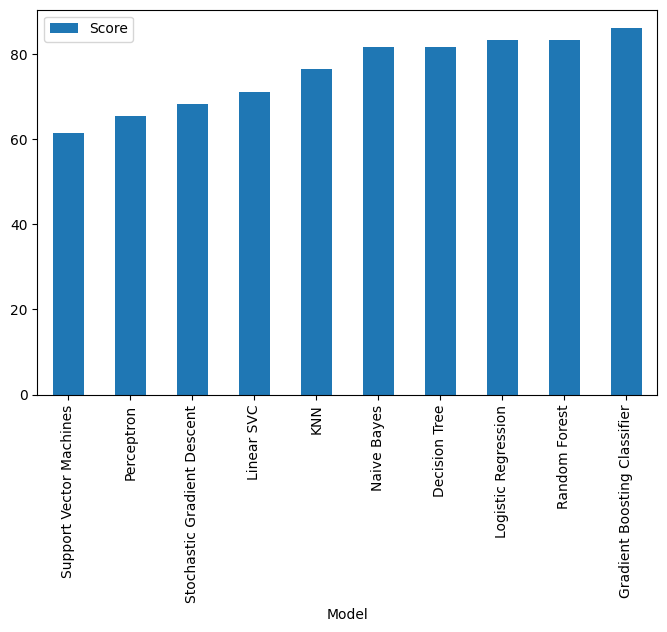

In [49]:
models.sort_values(by='Score', ascending=True).plot(x='Model', y='Score', kind='bar', figsize=(8,5))

# **I decided to use the Gradient Boosting Classifier model for the testing data.**

<a id="Submission"></a> <br> 
# **7.Submission:** 

In [50]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)


## **"If you've made it this far, congratulations, and thank you for taking the time to read! 😊 If you choose to utilize any section of this notebook in a published kernel, I would greatly appreciate credit—simply link back here. Your suggestions are invaluable, so please feel free to share them. Additionally, if you have any questions, don't hesitate to comment below. I'm eager to engage in further discussion and enhance the quality of this work. Thank you!"**

<span style="color:Red; font-size: 240%; font-weight: bold;">Best Of Luck ❤️
</span> 

---